In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### DATA 불러오기

In [2]:
df = pd.read_csv('seattle-weather.csv')
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


<hr>

### EDA 및 분석

In [3]:
df.info() # 데이터에 대한 전반적인 정보+결측치 확인+자료형확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [4]:
df.describe(include='all') # all 옵션 통해 전체 데이터에 대한 통계 정보

,date,precipitation,temp_max,temp_min,wind,weather
count,1461,1461.000000,1461.000000,1461.000000,1461.000000,1461
unique,1461,NaN,NaN,NaN,NaN,5
top,2012-01-01,NaN,NaN,NaN,NaN,rain
freq,1,NaN,NaN,NaN,NaN,641
mean,NaN,3.029432,16.439083,8.234771,3.241136,NaN
std,NaN,6.680194,7.349758,5.023004,1.437825,NaN
min,NaN,0.000000,-1.600000,-7.100000,0.400000,NaN
25%,NaN,0.000000,10.600000,4.400000,2.200000,NaN
50%,NaN,0.000000,15.600000,8.300000,3.000000,NaN
75%,NaN,2.800000,22.200000,12.200000,4.000000,NaN


In [5]:
df['weather'].value_counts() # weather column에 대한 고유한 행의 갯수

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

- drizzle 이슬비
- precipitation 강수량

<hr>

In [6]:
# 'date' 열을 날짜 형식으로 파싱
df['date'] = pd.to_datetime(df['date'])

In [7]:
# 'year' 열을 연도로 추출
df['year'] = df['date'].dt.year
df['year']

0       2012
1       2012
2       2012
3       2012
4       2012
        ... 
1456    2015
1457    2015
1458    2015
1459    2015
1460    2015
Name: year, Length: 1461, dtype: int32

In [8]:
# 'month' 열을 달로 추출
df['month'] = df['date'].dt.month
df['month']

0        1
1        1
2        1
3        1
4        1
        ..
1456    12
1457    12
1458    12
1459    12
1460    12
Name: month, Length: 1461, dtype: int32

In [9]:
# 'day' 열을 일로 추출
df['day'] = df['date'].dt.day
df['day']

0        1
1        2
2        3
3        4
4        5
        ..
1456    27
1457    28
1458    29
1459    30
1460    31
Name: day, Length: 1461, dtype: int32

In [10]:
df # year, month, day column 추가된 df

,date,precipitation,temp_max,temp_min,wind,weather,year,month,day
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1,3
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1,4
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1,5
...,...,...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,2015,12,27
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,2015,12,28
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,2015,12,29
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,2015,12,30


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
 6   year           1461 non-null   int32         
 7   month          1461 non-null   int32         
 8   day            1461 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(3), object(1)
memory usage: 85.7+ KB


C:\Users\jwoo\AppData\Local\Temp/ipykernel_18960/4255907711.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df['precipitation']))


<Axes: xlabel='precipitation', ylabel='Density'>

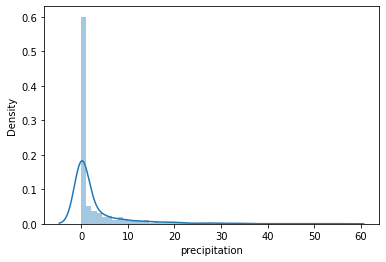

In [12]:
# 예측해야 하는 precipitation의 분포 확인
sns.distplot((df['precipitation']))

In [13]:
df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather',
       'year', 'month', 'day'],
      dtype='object')

<hr>

### 시각화

<Axes: xlabel='day', ylabel='precipitation'>

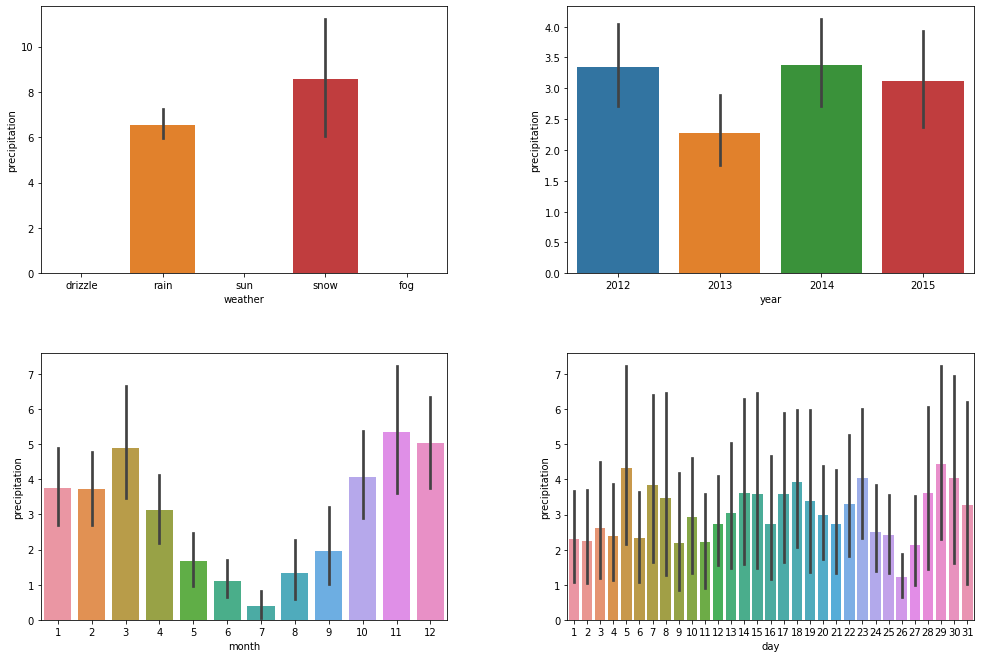

In [14]:
plt.rc('axes', titlesize=20)
#figure, axes = plt.subplots(nrows=3, ncols=2)
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(15,10)

# count Y값과 시계열적인 트렌드를 비교해서 인사이트를 뽑기!
sns.barplot(x='weather', y='precipitation', data=df, ax=axes[0,0])
sns.barplot(x='year', y='precipitation', data=df, ax=axes[0,1])
sns.barplot(x='month', y='precipitation', data=df, ax=axes[1,0])
sns.barplot(x='day', y='precipitation', data=df, ax=axes[1,1])

#sns.barplot(x='temp_max', y='precipitation', data=df, ax=axes[2,0])
#sns.barplot(x='temp_min', y='precipitation', data=df, ax=axes[2,1])

- precipitation column에 대한 weather, year, month, day feature에서의 분포에서 유의미한 차이 확인
    -  피처별로 강수량의 특징을 확인
        - weather: weather가 rain과 snow인 경우에만 강수량이 측정됨 / 해당 피처가 아닌 값들일 경우에는 비가 오지 않았음
        - year: (2013년 제외) 2012, 2014, 2015년에는 비슷한 강수량을 보임 BUT 2013년에는 강수량이 다른 해에 비해 현저히 적음
        - month: 여름인 6-8월에 가장 강수량이 적고 / 겨울인 11~12월에 높은 강수량이 측정됨 -> 계절의 특성?
        - day: 편차가 존재하지만 대체로 특정 날짜(5,7,18,23,29,30)에 많은 강수량이 측정되고 있음

### season column 추가 생성

In [15]:
# 위 month feature의 분석 결론에서 '계절' 아이디어, season column 추가 생성
# 1:봄, 2:여름, 3:가을, 4:겨울
df['season'] = df['month'].apply(lambda x: 1 if x <= 3 else (2 if x <= 6 else (3 if x <= 9 else 4)))

In [16]:
df

,date,precipitation,temp_max,temp_min,wind,weather,year,month,day,season
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1,1,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1,2,1
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1,3,1
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1,4,1
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1,5,1
...,...,...,...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,2015,12,27,4
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,2015,12,28,4
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,2015,12,29,4
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,2015,12,30,4


<Axes: xlabel='season', ylabel='precipitation'>

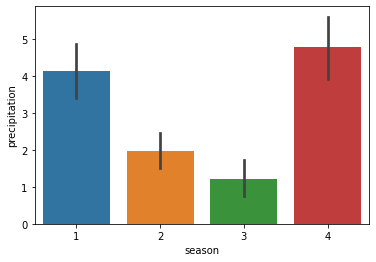

In [17]:
sns.barplot(x='season', y='precipitation', data=df)

- 봄과 겨울에 강수량 높음, 여름과 가을에 강수량 낮음

### 트렌드 확인

<Axes: xlabel='season', ylabel='precipitation'>

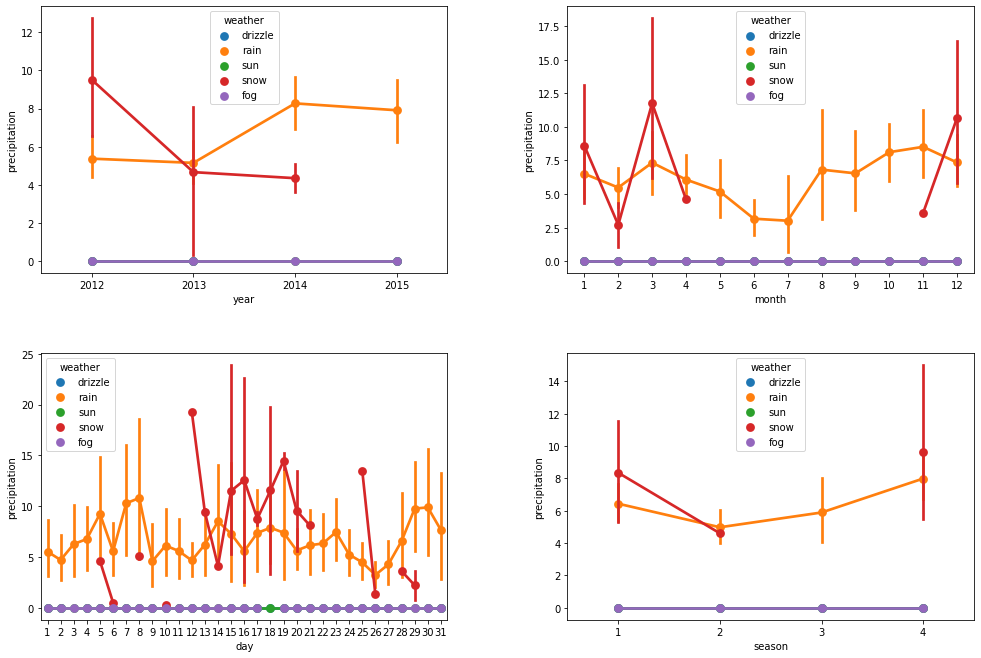

In [18]:
plt.rc('axes', titlesize=20)
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(15,10)

# count Y값과 시계열적인 트렌드를 비교해서 인사이트를 뽑기!
sns.pointplot(x='year', y='precipitation', hue='weather', data=df, ax=axes[0,0])
sns.pointplot(x='month', y='precipitation', hue='weather', data=df, ax=axes[0,1])
sns.pointplot(x='day', y='precipitation', hue='weather', data=df, ax=axes[1,0])
sns.pointplot(x='season', y='precipitation', hue='weather', data=df, ax=axes[1,1])

- 피처별로 weather에 따른 precipitation의 트렌드를 확인했을 때
    - 각 연도별로 rain과 snow의 차이가 존재한다. -> 2015년에는 snow에 의한 강수량이 없고, 2014년에는 눈보다 비가 많이 왔음을 확인 etc
    - 월별로 확인한 경우에는 강수량의 계절성을 확인할 수 있다. 특히 눈은 11~4월에만 내렸고, 비는 봄과 겨울에 많이 내렸다는 사실을 확인
    - 일별로 확인한 경우, 특정한 패턴을 확인하기는 어렵 BUT 특정 날에 덜 내리고 많이 내렸다는 사실을 확인

### 상관계수

In [19]:
df1 = df[['precipitation','temp_max','temp_min','wind']]
corr = df1.corr()
corr

,precipitation,temp_max,temp_min,wind
precipitation,1.000000,-0.228555,-0.072684,0.328045
temp_max,-0.228555,1.000000,0.875687,-0.164857
temp_min,-0.072684,0.875687,1.000000,-0.074185
wind,0.328045,-0.164857,-0.074185,1.000000


- 상관계수 -> 강수량은 온도보다는 바람속도와 높은 상관성이 존재

### 이상치

<Axes: xlabel='wind', ylabel='precipitation'>

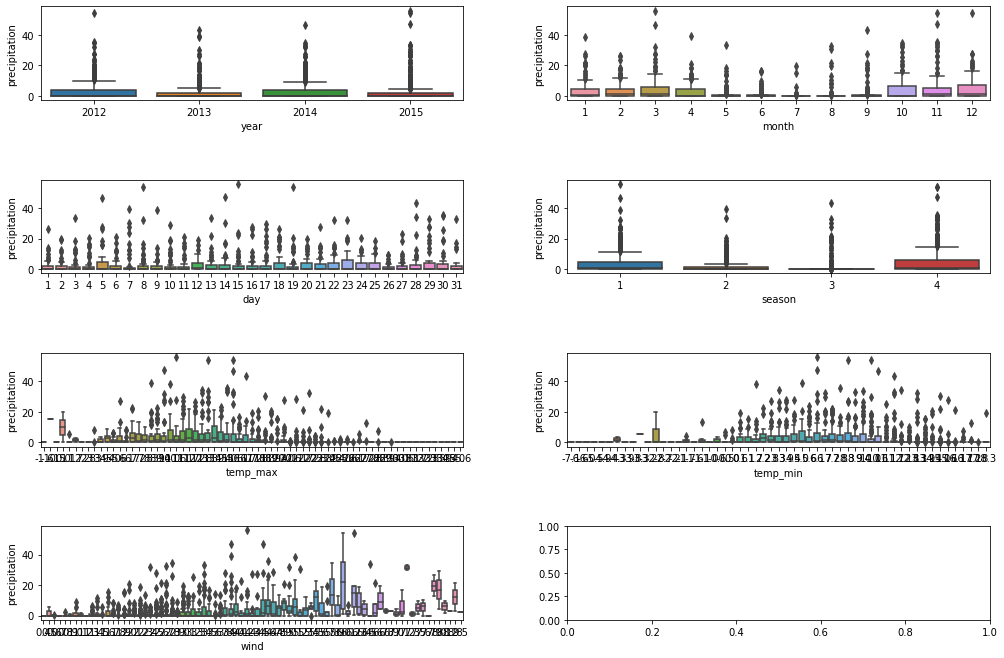

In [20]:
plt.rc('axes', titlesize=20)
figure, axes = plt.subplots(nrows=4, ncols=2)
plt.tight_layout()
figure.set_size_inches(15,10)

# count Y값과 시계열적인 트렌드를 비교해서 인사이트를 뽑기!
sns.boxplot(x='year', y='precipitation', data=df, ax=axes[0,0])
sns.boxplot(x='month', y='precipitation', data=df, ax=axes[0,1])
sns.boxplot(x='day', y='precipitation', data=df, ax=axes[1,0])
sns.boxplot(x='season', y='precipitation', data=df, ax=axes[1,1])
sns.boxplot(x='temp_max', y='precipitation', data=df, ax=axes[2,0])
sns.boxplot(x='temp_min', y='precipitation', data=df, ax=axes[2,1])
sns.boxplot(x='wind', y='precipitation', data=df, ax=axes[3,0])

### 산점도와 상관계수

<Axes: xlabel='season', ylabel='precipitation'>

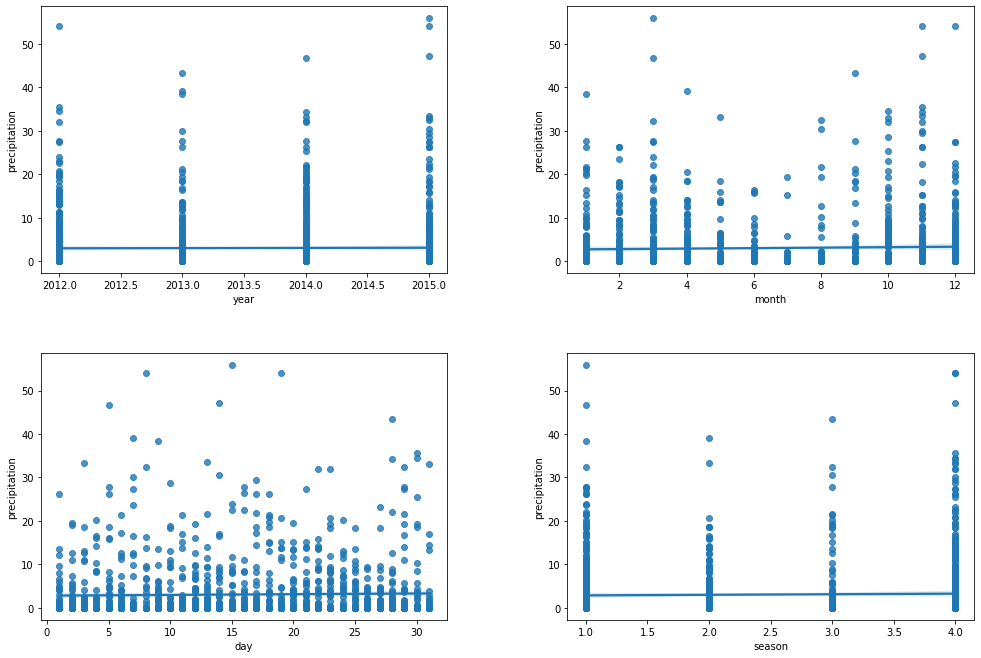

In [21]:
#날씨와 관련된 내용은 관련이 있다.
# 범주형 변수와 봤다면, 지금은 연속형 변수들과 체크해보자!
plt.rc('axes', titlesize=20)
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(15,10)

sns.regplot(x='year',y='precipitation',data = df, ax=axes[0,0])
sns.regplot(x='month',y='precipitation',data = df, ax=axes[0,1])
sns.regplot(x='day',y='precipitation',data = df, ax=axes[1,0])
sns.regplot(x='season',y='precipitation',data = df, ax=axes[1,1])

### Heatmap

열을 의미하는 heat와 지도를 뜻하는 map을 합친 단어이다. 데이터들의 배열 을 색상으로 표현해주는 그래프

[Text(0.5, 1.0, 'Heatmap')]

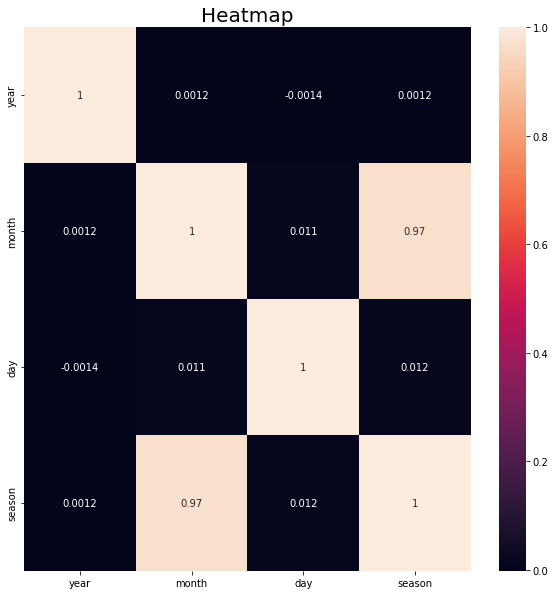

In [22]:
# 연속형 변수들과 확인해 보기!
df_corr = df[['year','month','day','season']].corr()
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(df_corr, annot=True)
ax.set(title='Heatmap')

<hr>

In [23]:
df_corr

,year,month,day,season
year,1.000000,0.001204,-0.001384,0.001240
month,0.001204,1.000000,0.010522,0.971392
day,-0.001384,0.010522,1.000000,0.012246
season,0.001240,0.971392,0.012246,1.000000


<hr>

### 모델링으로 실제 성능평가!

In [24]:
df

,date,precipitation,temp_max,temp_min,wind,weather,year,month,day,season
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1,1,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1,2,1
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1,3,1
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1,4,1
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1,5,1
...,...,...,...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,2015,12,27,4
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,2015,12,28,4
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,2015,12,29,4
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,2015,12,30,4


In [25]:
df = pd.get_dummies(df,dtype=int) # one-hot encoding 을 실행하는 함수 지원

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'year',
       'month', 'day', 'season', 'weather_drizzle', 'weather_fog',
       'weather_rain', 'weather_snow', 'weather_sun'],
      dtype='object')

In [28]:
df_sp=df[['precipitation','wind','year','month','day','season','weather_rain','weather_snow']]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df_sp.drop(columns='precipitation'), df_sp['precipitation'], test_size=0.3, random_state=111)

In [30]:
X_train

,wind,year,month,day,season,weather_rain,weather_snow
985,5.9,2014,9,12,3,0,0
914,3.1,2014,7,3,3,0,0
587,2.9,2013,8,10,3,1,0
1304,3.4,2015,7,28,3,0,0
207,2.2,2012,7,26,3,0,0
...,...,...,...,...,...,...,...
681,2.2,2013,11,12,4,1,0
1299,1.9,2015,7,23,3,0,0
86,3.8,2012,3,27,1,1,0
724,0.8,2013,12,25,4,0,0


### 선형회귀

In [31]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()

In [32]:
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [33]:
pred = linear_reg_model.predict(X_train)
pred_test = linear_reg_model.predict(X_test)

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
mean_squared_error(y_train, pred)

27.00458657115816

- 선형회귀를 활용한 mse(평균제곱오차)를 구한 결과 => 27 도출
- 줄이려면?

### 스케일링_표준화

In [1]:
# 예측오차를 더 줄이기 위해 스케일링 진행
from sklearn.preprocessing import StandardScaler # 표준화
scaler = StandardScaler()

In [37]:
train_x_sc = scaler.fit_transform(X_train)
test_x_sc = scaler.transform(X_test)

train_y = np.array(y_train)
train_y = train_y.reshape(-1,1)

test_y = np.array(y_test)
test_y = test_y.reshape(-1,1)

train_y_sc = scaler.fit_transform(train_y)
test_y_sc = scaler.transform(test_y)

In [38]:
# 스케일링 후 선형회귀 모델 진행
linear_reg_model.fit(train_x_sc, train_y_sc)

pred = linear_reg_model.predict(train_x_sc)
pred_test = linear_reg_model.predict(test_x_sc)

In [39]:
mean_squared_error(train_y_sc, pred) # mse 값 확인

0.6939884370236372

- 오차가 27에서 0.6으로 줄어든 것을 알 수 있다.
- 더 줄일 수는 없을까? 다른 방법은 뭐가 있을까?

<hr>

- 추후 다른 다양한 모델 사용/스케일링 시도해보기